# Coursera Capstone Project

Table of contents

1. Introduction: Business Problem
2. Data
3. Methodology
4. Results and Discussion
5. Conclusion

## 1. Introduction : Business Problem

#### 1.1 Description of the problem

The business problem we are currently posing is: This project would specifically help Business people planning to start Restaurants, Hotels, etc. in Jakarta, Indonesia.

The Foursquare API is used to access the venues in the neighborhoods. Since, it returns less venues in the neighborhoods, we would be analysing areas for which countable number of venues are obtained. Then they are clustered based on their venues using Data Science Techniques. Here the k-means clustering algorithm is used to achieve the task. The optimal number of clusters can be obtained using silhouette score. Folium visualization library can be used to visualize the clusters superimposed on the map of Jakarta city. These clusters can be analyzed to help small scale business owners select a suitable location for their need such as Hotels, Shopping Malls, Restaurants, or Coffee shops.



#### 1.2 Discussion of the problem

Jakarta , officially the Special Capital Region of Jakarta, is the capital of Indonesia. It lies on the northwest coast of Java (the world's most populous island). Jakarta is the centre of the economy, culture and politics of Indonesia. It has province level status which had a population of 10,562,088 as of 2020. Although Jakarta extends over only 699.5 square kilometres (270.1 sq mi), and thus has the smallest area of any Indonesian province, its metropolitan area covers 6,392 square kilometres (2,468 sq mi), and is the world's second-most populous urban area, after Tokyo. It has a population of about 35.934 million as of 2020. 

Jakarta's business opportunities, and its ability to offer a potentially higher standard of living than is available in other parts of the country, have attracted migrants from across the Indonesian archipelago, making it a melting pot of numerous cultures. 

So, how could we leverage Foursquare location data and machine learning to help us make decision and find appropriate neighborhoods? This is the problem I would like to address in this capstone project taking Jakarta as an example. In this project, I am going to use Foursquare location data and clustering methods to group the districts to different group by their Business venues information.

### Import the required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

!pip install opencage
from opencage.geocoder import OpenCageGeocode

from bs4 import BeautifulSoup

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

print('Folium installed')
print('Libraries imported.')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

## 2. Data 

For this project, the data we use are :

- Data Covid-19 cases per distict in Jakarta

Data Source : https://drive.google.com/file/d/1w5ovPYjXREfd7lz9o3GwAUQuqcDYhCC5/view.

But we will only use <b>nama_kota (CITY)</b> and <b>nama_kelurahan (DISTICT)</b> columns

- Restaurant in each neighborhood of Jakarta

Data Source : Foursquare API

- Longitude & Latittude of Jakarta City and the Districts

Data Source : OpenCage Geocoder API

In [2]:
# Read in the data Covid-19 cases per district (28 May,2020)
df = pd.read_excel('https://raw.githubusercontent.com/IbrahimBalweel/capstone-project/main/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00).xlsx')
df.head()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN


## 3. Methodology

select nama_kota & nama_kelurahan column

In [3]:
df = df[["nama_kota","nama_kelurahan"]]
df.head()

,nama_kota,nama_kelurahan
0,NaN,TOTAL
1,BELUM DIKETAHUI,BELUM DIKETAHUI
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA
3,JAKARTA BARAT,PEGADUNGAN
4,JAKARTA SELATAN,SENAYAN


drop index 0 - 2 row

In [4]:
indexNames = df[(df['nama_kelurahan'] == 'TOTAL') | 
                (df['nama_kelurahan'] == 'BELUM DIKETAHUI') | 
                (df['nama_kota'] == 'LUAR DKI JAKARTA')].index
df.drop(indexNames, inplace=True)
df.head()

,nama_kota,nama_kelurahan
3,JAKARTA BARAT,PEGADUNGAN
4,JAKARTA SELATAN,SENAYAN
5,JAKARTA BARAT,KEBON JERUK
6,JAKARTA UTARA,KELAPA GADING TIMUR
7,JAKARTA BARAT,TOMANG


Rename columns name to English

In [5]:
df = df.rename(columns = {'nama_kota':'CITY', 'nama_kelurahan':'DISTRICT'})
df.head()

,CITY,DISTRICT
3,JAKARTA BARAT,PEGADUNGAN
4,JAKARTA SELATAN,SENAYAN
5,JAKARTA BARAT,KEBON JERUK
6,JAKARTA UTARA,KELAPA GADING TIMUR
7,JAKARTA BARAT,TOMANG


### Get Latitude & Longitude of Jakarta city and the districts

We will use the API service from OpenCage Geocoder to obtain the latitude and longitude of all districts in Jakarta.

In [6]:
address = 'Jakarta, Indonesia'  

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print ('The Latitude and Longitude of Jakarta is {} and {} reprectively.'.format(latitude, longitude))

The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 reprectively.


In [7]:
# Get latitude and longitude of all districts
key = '3e6c528f803348a0a0b1ba2ca760cfa9'
geocoder = OpenCageGeocode(key)

list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df.iterrows(): # iterate over rows in dataframe
    District = row['DISTRICT']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df['Latitude'] = list_lat   
df['Longitude'] = list_long

Construct a map of all districts neighborhood in Jakarta 

In [8]:
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['DISTRICT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

In [9]:
CLIENT_ID = 'UN3TOO3JGZRS04SDDJ5TGYHYBDACG4Z1RA0ISTNLRMBOUAND' # your Foursquare ID
CLIENT_SECRET = 'LZ1ZSNQPTNT4OLJISK0NNPRNL4DCDWPAQ5OIMX0J0GLTZVUL' # your Foursquare Secret
CODE = 'MNOHWW1L5ZDV1F2HLVLBL1H5CSA3YFE4ZA3X2ADALPADCPSI'
ACCESS_TOKEN = 'A4CAXS4N3HHZHBLLOCK0544LKDI5HJG5U5SARLEI3C4KFJMC' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Your credentails:
CLIENT_ID: UN3TOO3JGZRS04SDDJ5TGYHYBDACG4Z1RA0ISTNLRMBOUAND
CLIENT_SECRET:LZ1ZSNQPTNT4OLJISK0NNPRNL4DCDWPAQ5OIMX0J0GLTZVUL


In [10]:
jkt_venues = getNearbyVenues(names=df['DISTRICT'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

PEGADUNGAN
SENAYAN
KEBON JERUK
KELAPA GADING TIMUR
TOMANG
DUREN SAWIT
KALIDERES
PONDOK PINANG
PONDOK KELAPA
CILANDAK BARAT
SRENGSENG
MENTENG DALAM
KELAPA GADING BARAT
BANGKA
HALIM PERDANA KUSUMAH
SUNTER AGUNG
PLUIT
TANJUNG BARAT
DURI KEPA
JATI
TEBET TIMUR
LEBAK BULUS
BINTARO
HARAPAN MULIA
KEDOYA SELATAN
KELAPA DUA
BATU AMPAR
RAWA BARAT
CIPINANG MUARA
PENGGILINGAN
TEBET BARAT
JELAMBAR
BUKIT DURI
KARET KUNINGAN
PALMERAH
CEMPAKA PUTIH BARAT
CAWANG
KAYU PUTIH
MENTENG
KALISARI
KEBAYORAN LAMA UTARA
KEDOYA UTARA
KEBON KOSONG
KEMBANGAN UTARA
JOHAR BARU
PISANGAN TIMUR
TUGU UTARA
PEJATEN BARAT
DURI KOSAMBI
KLENDER
KAYU MANIS
PADEMANGAN BARAT
SUNGAI BAMBU
PEJAGALAN
UTAN KAYU SELATAN
GROGOL SELATAN
KOTA BAMBU UTARA
ULUJAMI
CIRACAS
PEGANGSAAN DUA
TEGAL ALUR
CENGKARENG TIMUR
PEJATEN TIMUR
KEBAYORAN LAMA SELATAN
PONDOK BAMBU
PISANGAN BARU
GANDARIA UTARA
RAWAMANGUN
JAGAKARSA
PONDOK LABU
SUNTER JAYA
LUBANG BUAYA
SUKABUMI SELATAN
PASAR MANGGIS
PONDOK KOPI
CIPINANG BESAR UTARA
KAMPUNG RAWA
PESANGGRAHAN
U

In [11]:
print(jkt_venues.shape)
jkt_venues.head()

(3198, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PEGADUNGAN,-6.131373,106.701338,Pujasera,-6.130677,106.703824,Food Court
1,PEGADUNGAN,-6.131373,106.701338,Lotteria,-6.131090,106.703997,Fast Food Restaurant
2,PEGADUNGAN,-6.131373,106.701338,Gramedia,-6.135679,106.700749,Bookstore
3,PEGADUNGAN,-6.131373,106.701338,Lotte Mart,-6.131510,106.703910,Supermarket
4,PEGADUNGAN,-6.131373,106.701338,Bakmi Naga,-6.131371,106.703951,Noodle House


In [12]:
print('There are {} uniques catogories.'.format(len(jkt_venues['Venue Category'].unique())))

There are 253 uniques catogories.


In [13]:
jkt_venues.loc[:,'Venue Category'].value_counts()

Indonesian Restaurant                       225
Coffee Shop                                 183
Asian Restaurant                            158
Noodle House                                157
Fast Food Restaurant                        149
Convenience Store                           147
Chinese Restaurant                          138
Food Truck                                  111
Hotel                                       100
Café                                         87
Pizza Place                                  73
Japanese Restaurant                          57
Restaurant                                   53
Seafood Restaurant                           48
Food Court                                   46
Bakery                                       35
Soup Place                                   34
Shopping Mall                                33
Indonesian Meatball Place                    33
Donut Shop                                   30
Steakhouse                              

In [14]:
jkt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ANCOL,9,9,9,9,9,9
ANGKE,6,6,6,6,6,6
BALE KAMBANG,5,5,5,5,5,5
BALI MESTER,30,30,30,30,30,30
BAMBU APUS,5,5,5,5,5,5
BANGKA,25,25,25,25,25,25
BARU,5,5,5,5,5,5
BATU AMPAR,2,2,2,2,2,2
BENDUNGAN HILIR,22,22,22,22,22,22


### Analysis

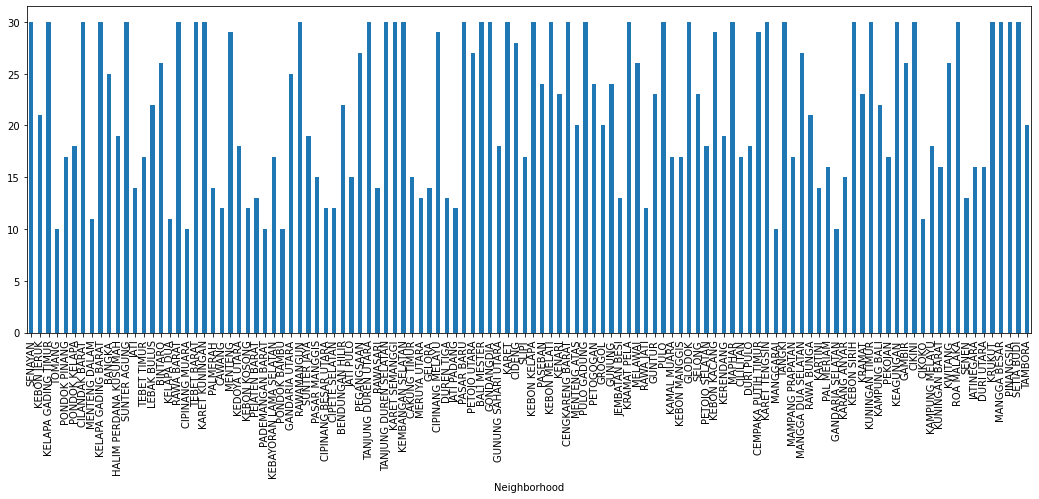

In [15]:
df_plot = jkt_venues.groupby(['Neighborhood'], sort=False)['Venue'].count()
df_plot = df_plot[df_plot >= 10]
df_plot.plot.bar(figsize=(18,6))


Lets create a new dataframe, jkt_venues_top that contains only the neighborhoods with 10+ venues and the venues with their details included.

In [16]:
jkt_venues_top = jkt_venues[jkt_venues['Neighborhood'].isin(df_plot.index.tolist())]
jkt_venues_top.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,SENAYAN,-6.226911,106.80992,Cork&Screw,-6.225700,106.808919,Wine Bar
8,SENAYAN,-6.226911,106.80992,Beer Hall,-6.228391,106.810405,Beer Bar
9,SENAYAN,-6.226911,106.80992,Benedict,-6.225327,106.810616,Café
10,SENAYAN,-6.226911,106.80992,Kimukatsu [ キムカツ ],-6.225531,106.809960,Japanese Restaurant
11,SENAYAN,-6.226911,106.80992,Pacific Place,-6.224843,106.809792,Shopping Mall


### Modelling

One Hot Encoding to Analyze Each Neighborhood

In [17]:
jkt_onehot = pd.get_dummies(jkt_venues_top['Venue Category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jkt_onehot['Neighborhood'] = jkt_venues_top['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = jkt_onehot.columns.tolist()
fixed_columns.insert(0, fixed_columns.pop(fixed_columns.index('Neighborhood')))
jkt_onehot = jkt_onehot.reindex(columns = fixed_columns)

print(jkt_onehot.shape)
jkt_onehot.head()

(2533, 216)


,Neighborhood,Accessories Store,Acehnese Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betawinese Restaurant,Big Box Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Academic Building,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,General College & University,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lingerie Store,Lounge,Malay Restaurant,Manadonese Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Night Market,Nightclub,Noodle House,Office,Padangnese Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Public Art,Racetrack,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Train,Train Station,Travel Agency,Turkish Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
7,SENAYAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,SENAYAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,SENAYAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [18]:
jkt_grouped = jkt_onehot.groupby('Neighborhood').mean().reset_index()
print(jkt_grouped.shape)
jkt_grouped.head()

(116, 216)


,Neighborhood,Accessories Store,Acehnese Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betawinese Restaurant,Big Box Store,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Academic Building,College Cafeteria,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,General College & University,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Lingerie Store,Lounge,Malay Restaurant,Manadonese Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Night Market,Nightclub,Noodle House,Office,Padangnese Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Public Art,Racetrack,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Ski Area,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Student Center,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tea Room,Tech Startup,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Train,Train Station,Travel Agency,Turkish Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,BALI MESTER,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.033333,0.033333,0.0,0.0,0.0,0.0,0.033333,0.033333,0.000000,0.0,0.033333,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.133333,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.033333,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.00,0.066667,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.00,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,

In [19]:
#Output each neighborhood along with the top 5 most common venues:
num_top_venues = 5

for hood in jkt_grouped['Neighborhood']:
    print('------'+hood+'------')
    temp = jkt_grouped[jkt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns=['venue','freq']
    temp=temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------BALI MESTER------
                  venue  freq
0     Convenience Store  0.20
1  Fast Food Restaurant  0.13
2         Jewelry Store  0.07
3    Chinese Restaurant  0.07
4   Japanese Restaurant  0.07


------BANGKA------
                venue  freq
0              Lounge  0.08
1         Coffee Shop  0.08
2        Camera Store  0.08
3                Café  0.08
4  Italian Restaurant  0.04


------BENDUNGAN HILIR------
                   venue  freq
0  Indonesian Restaurant  0.23
1      Convenience Store  0.18
2            Pizza Place  0.09
3           Noodle House  0.09
4    Javanese Restaurant  0.05


------BINTARO------
                   venue  freq
0   Fast Food Restaurant  0.15
1  Indonesian Restaurant  0.15
2      Convenience Store  0.12
3       Asian Restaurant  0.08
4            Pizza Place  0.04


------CAKUNG TIMUR------
                  venue  freq
0            Theme Park  0.13
1           Pizza Place  0.13
2           Coffee Shop  0.13
3      Department Store  0.07
4  Fas


The following function returns the top_venues of each neighborhood.

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


Lets use the above function to obtaine the 10 most common venues in each neighborhood and store in the new pandas dataframe neighborhoods_venues_sorted.

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jkt_grouped['Neighborhood']

for ind in np.arange(jkt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jkt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BALI MESTER,Convenience Store,Fast Food Restaurant,Chinese Restaurant,Indonesian Restaurant,Japanese Restaurant,Jewelry Store,Miscellaneous Shop,Grocery Store,Bar,Seafood Restaurant
1,BANGKA,Lounge,Coffee Shop,Camera Store,Café,Mexican Restaurant,Gym / Fitness Center,Market,Supermarket,Beach,Gourmet Shop
2,BENDUNGAN HILIR,Indonesian Restaurant,Convenience Store,Pizza Place,Noodle House,Residential Building (Apartment / Condo),Spa,Food Truck,Coffee Shop,Resort,Soup Place
3,BINTARO,Indonesian Restaurant,Fast Food Restaurant,Convenience Store,Asian Restaurant,Coffee Shop,Spa,Department Store,Fish & Chips Shop,Supermarket,Gym
4,CAKUNG TIMUR,Coffee Shop,Pizza Place,Theme Park,Department Store,Food Court,Multiplex,Supermarket,Burger Joint,Shopping Mall,Fast Food Restaurant


### Cluster Neighborhoods

Here k-Nearest Neighborhoods clustering technique is used. Lets use the silhouette_score to obtain the best value for the number of clusters.

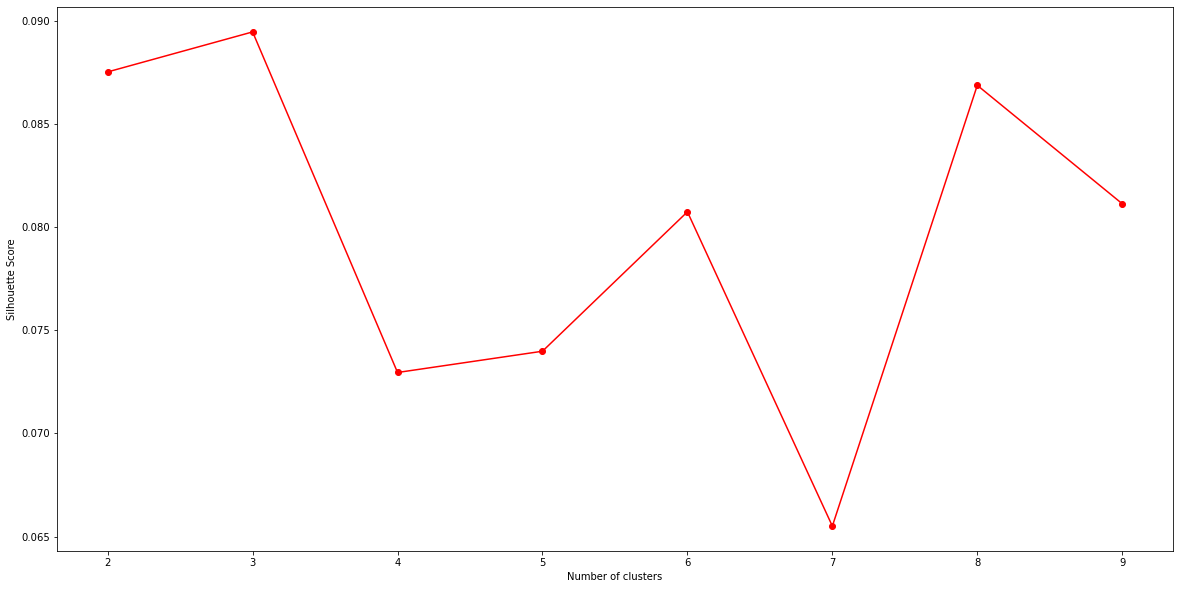

In [22]:
jkt_grouped_clustering = jkt_grouped.drop('Neighborhood', 1)

max_score = 10
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(jkt_grouped_clustering)
    
    # Gets the silhouette score
    score = silhouette_score(jkt_grouped_clustering, kmeans)
    scores.append(score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()

As seen from the above line plot, the best number of clusters having the highest silhouette score is 4. So, lets consider the number of clusters as 4.

In [23]:
# select best number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jkt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 2, 3, 2, 0, 1, 0, 0], dtype=int32)


Add the cluster labels to the neighborhoods_venues_sorted dataframe. And lets create a new datframe jkt_merged which has the neighborhood details, cluster labels and the 10 most common venues in that neighborhood.

In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jkt_merged = jkt_venues_top[jkt_venues_top.columns[0:3]].drop_duplicates()
jkt_merged.reset_index(drop = True, inplace = True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jkt_merged = jkt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jkt_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,SENAYAN,-6.226911,106.809920,0,Shopping Mall,Department Store,Café,American Restaurant,Korean Restaurant,Restaurant,Coffee Shop,Sushi Restaurant,Bar,Grocery Store
1,KEBON JERUK,-6.192572,106.769726,0,Noodle House,Concert Hall,Asian Restaurant,Auto Dealership,Ice Cream Shop,Juice Bar,Food Truck,Café,Music School,Coffee Shop
2,KELAPA GADING TIMUR,-6.168293,106.904214,1,Noodle House,Chinese Restaurant,Food Truck,Indonesian Restaurant,Asian Restaurant,Ice Cream Shop,Massage Studio,Cosmetics Shop,Convenience Store,Electronics Store
3,TOMANG,-6.172725,106.797301,2,Convenience Store,Indonesian Restaurant,Café,Soup Place,Coffee Shop,Music Venue,Gym,Noodle House,Food Truck,Food Stand
4,PONDOK PINANG,-6.275479,106.780403,3,Noodle House,Coffee Shop,Food Court,Pizza Place,Boutique,Food Truck,Park,Asian Restaurant,Convenience Store,Pool


Examining the resulting Clusters

### Cluster 1

In [25]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 0, jkt_merged.columns[[0] + list(range(4, jkt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,SENAYAN,Shopping Mall,Department Store,Café,American Restaurant,Korean Restaurant,Restaurant,Coffee Shop,Sushi Restaurant,Bar,Grocery Store
1,KEBON JERUK,Noodle House,Concert Hall,Asian Restaurant,Auto Dealership,Ice Cream Shop,Juice Bar,Food Truck,Café,Music School,Coffee Shop
7,MENTENG DALAM,Indonesian Restaurant,Food Truck,Hotel,Karaoke Bar,Ski Area,Coffee Shop,Grocery Store,Fast Food Restaurant,Fish & Chips Shop,Fried Chicken Joint
8,KELAPA GADING BARAT,Hotel,Japanese Restaurant,Supermarket,Seafood Restaurant,Steakhouse,Bistro,Spa,Soup Place,Fried Chicken Joint,Bridal Shop
9,BANGKA,Lounge,Coffee Shop,Camera Store,Café,Mexican Restaurant,Gym / Fitness Center,Market,Supermarket,Beach,Gourmet Shop
10,HALIM PERDANA KUSUMAH,Food Truck,Betawinese Restaurant,Pizza Place,Electronics Store,Burger Joint,Music Venue,Seafood Restaurant,Grocery Store,Padangnese Restaurant,Satay Restaurant
12,JATI,Indonesian Restaurant,Music Store,Asian Restaurant,Pool Hall,Café,Food Truck,Bubble Tea Shop,Grocery Store,Hardware Store,Dessert Shop
13,TEBET TIMUR,Art Gallery,Indonesian Restaurant,Asian Restaurant,Restaurant,Salon / Barbershop,Café,Farmers Market,Noodle House,Fish & Chips Shop,Steakhouse
14,LEBAK BULUS,Café,Asian Restaurant,Soup Place,Convenience Store,Indonesian Restaurant,Bubble Tea Shop,Paper / Office Supplies Store,Sushi Restaurant,Coffee Shop,Chinese Restaurant
19,TEBET BARAT,Indonesian Restaurant,Dessert Shop,Hotel,Pet Store,Fast Food Restaurant,Middle Eastern Restaurant,Soup Place,Breakfast Spot,Fried Chicken Joint,Food Truck


In [26]:
cluster1 = jkt_merged.loc[jkt_merged['Cluster Labels'] == 0, jkt_merged.columns[[0] + 
                                                                                    list(range(4, jkt_merged.shape[1]))]]
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))

Indonesian Restaurant    26
Café                     22
Coffee Shop              21
Hotel                    20
Food Truck               17
Asian Restaurant         16
Fast Food Restaurant     14
Restaurant               11
Seafood Restaurant        9
Noodle House              9
dtype: int64


### Cluster 2

In [27]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 1, jkt_merged.columns[[0] + list(range(4, jkt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,KELAPA GADING TIMUR,Noodle House,Chinese Restaurant,Food Truck,Indonesian Restaurant,Asian Restaurant,Ice Cream Shop,Massage Studio,Cosmetics Shop,Convenience Store,Electronics Store
11,SUNTER AGUNG,Indonesian Restaurant,Massage Studio,Chinese Restaurant,Asian Restaurant,Noodle House,Spa,Indian Restaurant,Bakery,Fruit & Vegetable Store,Betawinese Restaurant
32,SUNTER JAYA,Noodle House,Asian Restaurant,Indonesian Restaurant,Food Truck,Soup Place,Chinese Restaurant,Coffee Shop,Steakhouse,Grocery Store,Café
39,TANJUNG DUREN UTARA,Noodle House,BBQ Joint,Indonesian Meatball Place,Indonesian Restaurant,Café,Asian Restaurant,Diner,Fish & Chips Shop,Massage Studio,Chinese Restaurant
45,MERUYA UTARA,Asian Restaurant,Noodle House,Indonesian Meatball Place,Supermarket,Seafood Restaurant,Park,Hardware Store,Pizza Place,Convenience Store,Dog Run
50,PASAR BARU,Pizza Place,Chinese Restaurant,Noodle House,Food Truck,Art Gallery,Coffee Shop,Soup Place,Juice Bar,Miscellaneous Shop,Bookstore
58,KEBON KELAPA,Chinese Restaurant,Seafood Restaurant,Hotel,Noodle House,Padangnese Restaurant,BBQ Joint,Breakfast Spot,Steakhouse,Snack Place,Sundanese Restaurant
62,CENGKARENG BARAT,Asian Restaurant,Chinese Restaurant,Noodle House,Fried Chicken Joint,Indonesian Restaurant,Restaurant,Soup Place,Bookstore,Food,Café
66,GROGOL,Noodle House,Food Truck,Restaurant,Asian Restaurant,Farmers Market,Dessert Shop,Snack Place,Food,Basketball Court,Coffee Shop
80,KERENDANG,Chinese Restaurant,Food Truck,Seafood Restaurant,Asian Restaurant,Convenience Store,Noodle House,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Food Court


In [28]:
cluster2 = jkt_merged.loc[jkt_merged['Cluster Labels'] == 1, jkt_merged.columns[[0] + 
                                                                                    list(range(4, jkt_merged.shape[1]))]]
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))

Noodle House             19
Chinese Restaurant       17
Asian Restaurant         14
Indonesian Restaurant    10
Food Truck                9
Soup Place                6
Coffee Shop               5
Seafood Restaurant        5
Café                      5
Steakhouse                4
dtype: int64


### Cluster 3

In [29]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 2, jkt_merged.columns[[0] + list(range(4, jkt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,TOMANG,Convenience Store,Indonesian Restaurant,Café,Soup Place,Coffee Shop,Music Venue,Gym,Noodle House,Food Truck,Food Stand
5,PONDOK KELAPA,Pool,Convenience Store,Restaurant,Steakhouse,Massage Studio,Noodle House,Donut Shop,Pizza Place,Salon / Barbershop,Café
15,BINTARO,Indonesian Restaurant,Fast Food Restaurant,Convenience Store,Asian Restaurant,Coffee Shop,Spa,Department Store,Fish & Chips Shop,Supermarket,Gym
18,CIPINANG MUARA,Food Truck,Indonesian Restaurant,Pizza Place,Middle Eastern Restaurant,Coffee Shop,Asian Restaurant,Noodle House,Dumpling Restaurant,Convenience Store,Food Stand
22,CAWANG,Asian Restaurant,Fast Food Restaurant,Convenience Store,Supermarket,Indonesian Restaurant,Chinese Restaurant,Coffee Shop,Train Station,Food Court,Fish & Chips Shop
26,PEJATEN BARAT,Food Truck,Convenience Store,Department Store,Bridal Shop,Pharmacy,Asian Restaurant,Music Venue,Shopping Mall,Noodle House,Fish & Chips Shop
28,KEBAYORAN LAMA SELATAN,Noodle House,Coffee Shop,Convenience Store,Padangnese Restaurant,Karaoke Bar,Furniture / Home Store,Tech Startup,Hardware Store,Electronics Store,Food Truck
36,BENDUNGAN HILIR,Indonesian Restaurant,Convenience Store,Pizza Place,Noodle House,Residential Building (Apartment / Condo),Spa,Food Truck,Coffee Shop,Resort,Soup Place
40,RAWASARI,Seafood Restaurant,Food Truck,Convenience Store,College Cafeteria,Grocery Store,Hardware Store,Middle Eastern Restaurant,Nightclub,Pizza Place,Restaurant
47,CIPINANG MELAYU,Fast Food Restaurant,Convenience Store,Indonesian Restaurant,Japanese Restaurant,Grocery Store,Boutique,Gym / Fitness Center,Food Court,Café,Seafood Restaurant


In [30]:
cluster3 = jkt_merged.loc[jkt_merged['Cluster Labels'] == 2, jkt_merged.columns[[0] + 
                                                                                    list(range(4, jkt_merged.shape[1]))]]
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))

Convenience Store        24
Fast Food Restaurant     17
Indonesian Restaurant    17
Coffee Shop              15
Asian Restaurant         14
Food Truck               12
Noodle House             10
Café                      8
Chinese Restaurant        8
Food Court                8
dtype: int64


### Cluster 4

In [31]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 3, jkt_merged.columns[[0] + list(range(4, jkt_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,PONDOK PINANG,Noodle House,Coffee Shop,Food Court,Pizza Place,Boutique,Food Truck,Park,Asian Restaurant,Convenience Store,Pool
6,CILANDAK BARAT,Coffee Shop,Asian Restaurant,Café,Pizza Place,Ice Cream Shop,Indian Restaurant,Bakery,Steakhouse,Student Center,Farmers Market
16,KELAPA DUA,Indonesian Restaurant,Coffee Shop,Asian Restaurant,Steakhouse,Bakery,Chinese Restaurant,Park,Office,Convenience Store,Event Space
17,RAWA BARAT,Japanese Restaurant,Coffee Shop,Chinese Restaurant,Indonesian Restaurant,Asian Restaurant,Paper / Office Supplies Store,Korean Restaurant,Martial Arts School,Grocery Store,Tea Room
20,KARET KUNINGAN,Coffee Shop,Hotel,Pizza Place,Soccer Field,Thai Restaurant,Convenience Store,Noodle House,Restaurant,Salad Place,Chinese Restaurant
21,PALMERAH,Pizza Place,Noodle House,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Gourmet Shop,Medical Center,Gym,Convenience Store,Hotel
24,KEDOYA UTARA,Coffee Shop,Spa,Pool Hall,Pizza Place,Women's Store,Steakhouse,Fast Food Restaurant,Grocery Store,Noodle House,Chinese Restaurant
27,PADEMANGAN BARAT,Coffee Shop,Seafood Restaurant,Bookstore,Hotel,Arts & Crafts Store,Chinese Restaurant,Indonesian Restaurant,Donut Shop,Field,Fried Chicken Joint
29,PONDOK BAMBU,Department Store,Coffee Shop,Sports Bar,Bridal Shop,Flea Market,Night Market,Fast Food Restaurant,Park,Soup Place,Arcade
34,CIPINANG BESAR UTARA,Coffee Shop,Asian Restaurant,Gift Shop,Food Court,Shopping Mall,Supermarket,Café,Donut Shop,Movie Theater,Fish & Chips Shop


In [32]:
cluster4 = jkt_merged.loc[jkt_merged['Cluster Labels'] == 3, jkt_merged.columns[[0] + list(range(4, jkt_merged.shape[1]))]]
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))

Coffee Shop              26
Pizza Place               9
Indonesian Restaurant     9
Chinese Restaurant        9
Hotel                     8
Convenience Store         8
Asian Restaurant          8
Food Court                7
Fast Food Restaurant      7
Noodle House              7
dtype: int64


## 4. Discussion & Result

The clustering is completely based on the most common venues obtained from Foursquare data.

What we see in the table are the city districts and their most common venues, and they now have been assigned five different cluster labels from 0 to 4.

We got a glimpse of the Restaurants in Jakarta and were able to find out some interesting insights which might be useful to investors who plan to open a Business in Jakarta.

Lets visulaize the top 5 most common venue categories in each of the cluster.

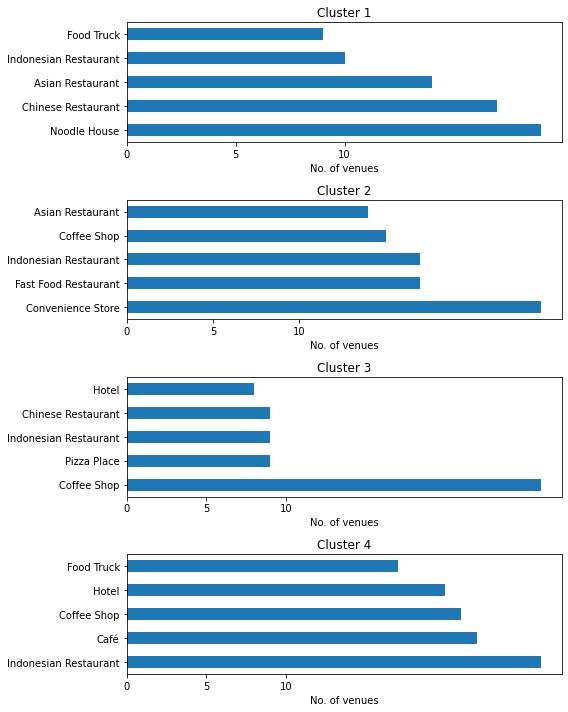

In [33]:
df_list = [venues1 ,venues2, venues3, venues4]
fig, axes = plt.subplots(4)

count = 0
for r in range(4):
    df_list[count].value_counts().head().plot.barh(figsize=(8,10))
    axes[r].set_title('Cluster {}'.format(count+1))
    plt.sca(axes[r])
    plt.xticks(np.arange(0, 15, 5))
    plt.xlabel('No. of venues')
    count += 1

fig.tight_layout()

In [34]:
# create map
jkt_clusters_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jkt_merged['Neighborhood Latitude'], jkt_merged['Neighborhood Longitude'], jkt_merged['Neighborhood'], jkt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(jkt_clusters_map)
       
jkt_clusters_map

## 5. Conclusion

In the current digital age, there are many real-life problems/cases. We can find corresponding solutions by searching for data-analyzing data. As seen in the example above, the data content is based on the distribution of the most common dining places (restaurants) in the Jakarta neighborhoods. The results of the analysis can help investors determine the most suitable areas for investment.

I used some commonly used python libraries to extract web data, used the Foursquare API to explore the main areas of Jakarta, and used the Folium leaflet map to see the results of the region segmentation.

Similarly, data can also be used to solve other problems that most people face in large cities. The potential for such analysis in real life is discussed in detail. In addition, some shortcomings and improvement opportunities are mentioned to represent more realistic pictures.






